# Imports and Data Accessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
emotion_raw = pd.read_csv('emotions.csv')
emotion_raw.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [5]:
#get spectral data
spectral_data = emotion_raw.loc[:, 'fft_0_b':'label']
spectral_data

,fft_0_b,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,-508.0,438.00,-222.00,-222.00,438.00,143.0,59.40,5.05,5.05,59.40,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,126.0,-4.00,7.42,7.42,-4.00,81.6,-22.30,35.30,35.30,-22.30,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,-85.9,361.00,-62.20,-62.20,361.00,-558.0,684.00,-152.00,-152.00,684.00,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,69.5,3.89,12.10,12.10,3.89,-188.0,274.00,-200.00,-200.00,274.00,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,226.0,-27.40,147.00,147.00,-27.40,301.0,-8.48,138.00,138.00,-8.48,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,105.0,3.37,29.20,29.20,3.37,151.0,-19.40,8.89,8.89,-19.40,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,-23.0,202.00,-81.60,-81.60,202.00,-345.0,404.00,-205.00,-205.00,404.00,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-288.0,312.00,-259.00,-259.00,312.00,-186.0,276.00,-199.00,-199.00,276.00,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,109.0,2.48,49.00,49.00,2.48,-230.0,216.00,-92.40,-92.40,216.00,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


# Data Visualization

In [6]:
#plot spectral data
def plotSpectralArray(data,name):
    copy = data.drop(columns='label')
    plt.figure(figsize=(16, 10))
    plt.plot(range(len(copy)), copy)
    plt.title(name + " Features fft_0_b through fft_749_b")
    plt.show()
    return

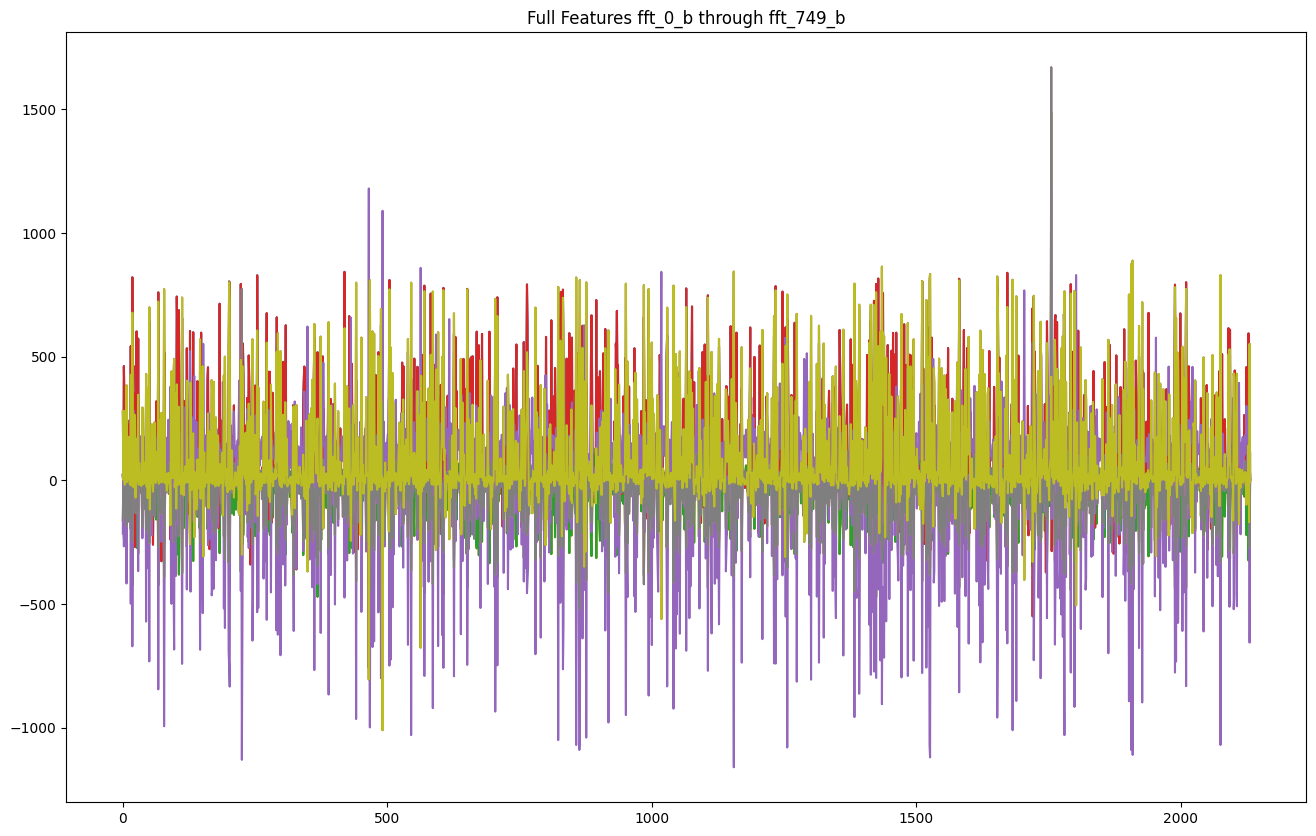

In [7]:
#full spectral array
plotSpectralArray(spectral_data.iloc[:,-10:], 'Full')

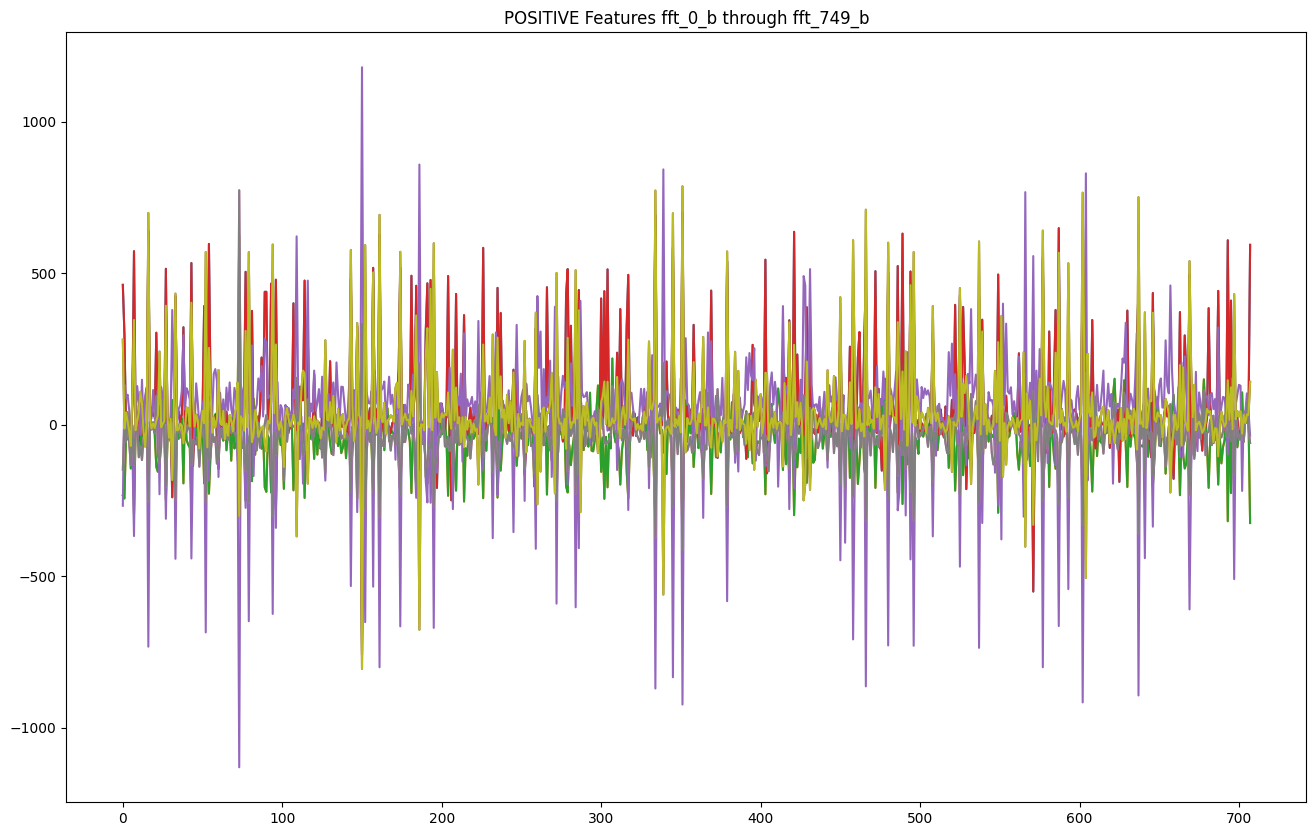

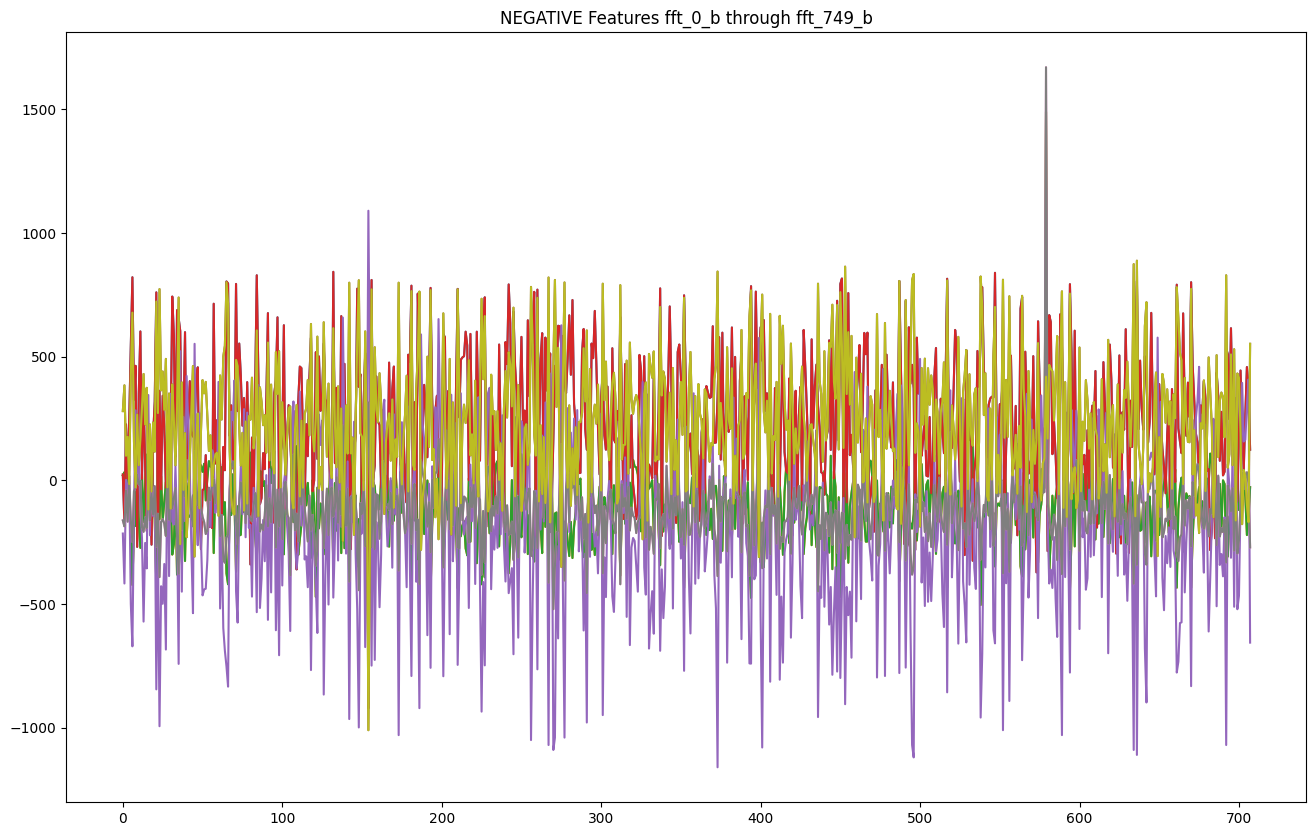

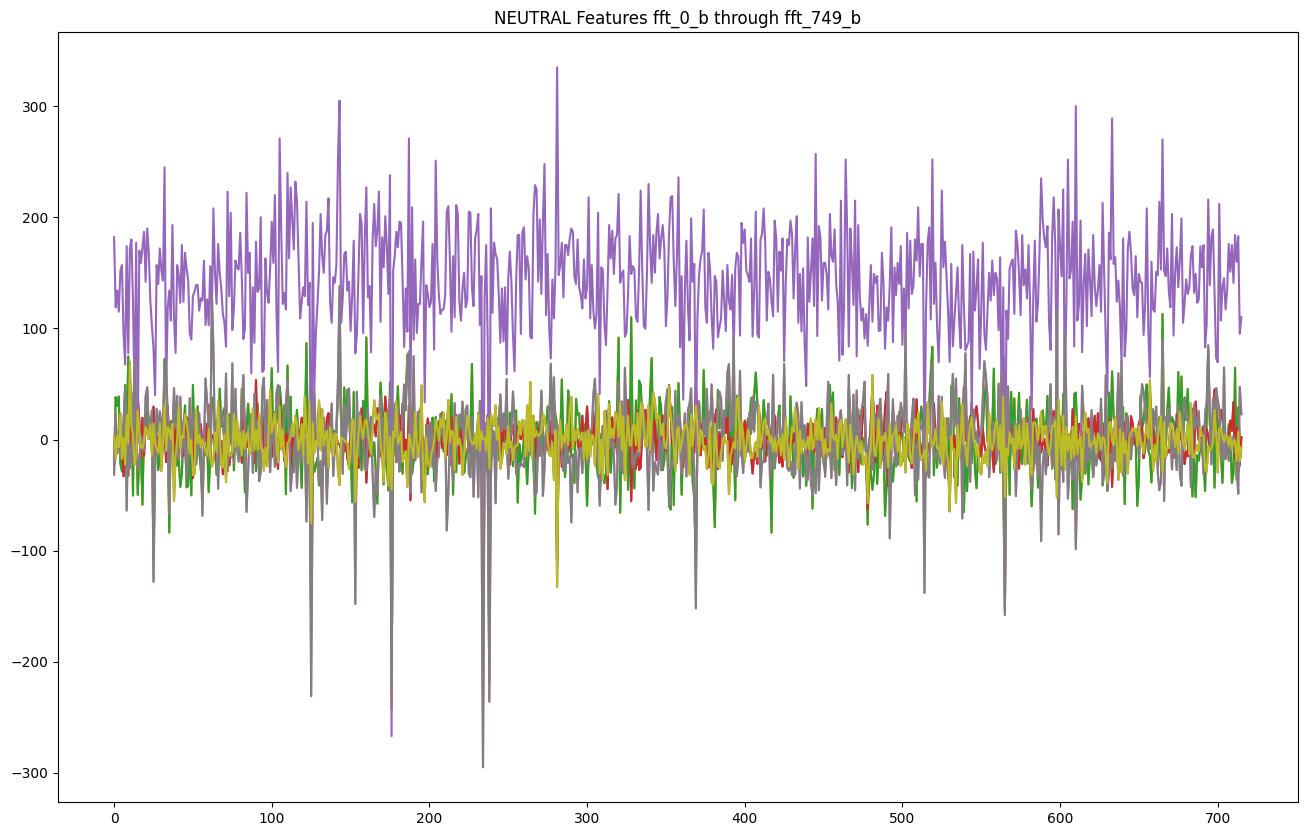

In [9]:
#splitting data by emotional valence and plotting subset
for emotion in ['POSITIVE','NEGATIVE','NEUTRAL']:
    emo_data = spectral_data.loc[spectral_data['label'] == emotion,:]
    plotSpectralArray(emo_data.iloc[:,-10:],emotion)

Notable points: 

1) Higher variability and larger extreme points visually apparent in 'NEGATIVE' brain waves. Lower variability in similar ways for 'NEUTRAL' categories. This may be effectively captured by RNNs so we will first try to maximize accuracy with RNNs, but we will also try CNNs as they are typically used in spectral data ML processing. We will also add a few other models to see if the extra processing we're doing is worth the computational effort.

2) Neutral data points specifically seem to be offset from the mean -- normalize everything before we run it so the learning isn't occurring with the anomalous values.

3) ~700 samples/emotion -- no need to scale for biased data

# Model Development and Execution

In [10]:
#logistic model creation
def logisticModel(normalize):
    model = tf.keras.models.Sequential([
        #always normalize since since graphs seem to be upshifted
        normalize,
        #simple logistic model first with 3 nodes see what we're starting with
        layers.Dense(units = 3, activation = 'softmax',kernel_regularizer=regularizers.L2(0.05))
    ])
    return model

In [11]:
#LSTM model
def LSTMModel(normalize):
    model = tf.keras.models.Sequential([
        normalize,
        #expand dims for LSTM time freq.
        layers.Reshape((1, -1)),
        #LSTM layer
        layers.GRU(256, return_sequences=True),
        #Flatten output of LSTM
        layers.Flatten(),
        #final logistic layer for classification
        layers.Dense(3, activation='softmax',kernel_regularizer=regularizers.L2(0.05))
    ])
    print(model.summary())
    return model

In [43]:
#GRU model
def GRUModel(normalize):
    model = tf.keras.models.Sequential([
        normalize,
        #expand dims for GRU time freq.
        layers.Reshape((1, -1)),
        #LSTM layer
        layers.GRU(256, return_sequences=True),
        #Flatten output of GRU
        layers.Flatten(),
        #final logistic layer for classification
        layers.Dense(3, activation='softmax',kernel_regularizer=regularizers.L2(0.05))
    ])
    print(model.summary())
    return model

In [35]:
def runModel(data,modelFunc):
    #adjust nominal label
    spectral_data['label'] = pd.factorize(spectral_data['label'])[0]
    #split data
    training_features, test_features, training_labels, test_labels = train_test_split(data.drop(columns='label'),data['label'], test_size = 0.1)
    #normalization
    normalize = layers.Normalization()
    normalize.adapt(training_features)
    #model creation and compilation
    model = modelFunc(normalize)
    model.compile(loss = 'sparse_categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['Accuracy'])
    evaluateModel(training_features, test_features, training_labels, test_labels, model)

In [36]:
def evaluateModel(training_features, test_features, training_labels, test_labels, model):
    print('TRAINING . . . \n')
    model.fit(training_features,training_labels, epochs=10)
    print('\n\n\n TESTING . . . \n')
    model.evaluate(test_features,test_labels,verbose=2)
    #plotting out feature confusion matrix
    predictions = list(map(lambda x: np.argmax(x), model.predict(test_features)))
    display = ConfusionMatrixDisplay.from_predictions(test_labels, predictions,display_labels=['POS','NEG','NEU'],cmap='copper')
    plt.show()

# Running of Model/ Results




 logisticModel


TRAINING . . . 

Epoch 1/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9931 - Accuracy: 0.7523
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 0.8159 - Accuracy: 0.8420
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7318 - Accuracy: 0.8644
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6959 - Accuracy: 0.8519
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6353 - Accuracy: 0.8780
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6014 - Accuracy: 0.8811
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5771 - Accuracy: 0.8801
Epoch 8/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5481 - Accuracy: 0.8884
Epoch 9/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5443 - Accuracy: 0.8863
Epoch 10/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5087 -

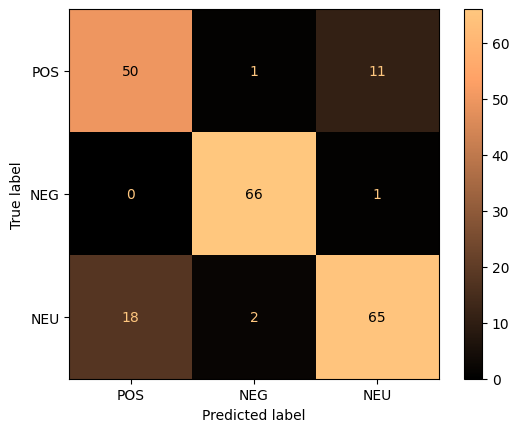




 LSTMModel


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_23 (Normaliza  (None, 750)              1501      
 tion)                                                           
                                                                 
 reshape_15 (Reshape)        (None, 1, 750)            0         
                                                                 
 gru_8 (GRU)                 (None, 1, 256)            774144    
                                                                 
 flatten_12 (Flatten)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 3)                 771       
                                                                 
Total params: 776,416
Trainable params: 774,915
Non-trainable params: 1,501
___________________________

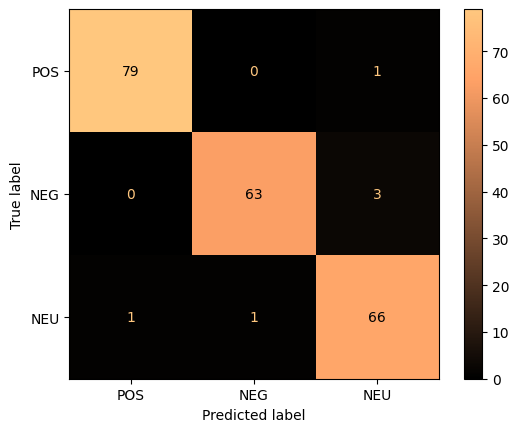




 GRUModel


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_24 (Normaliza  (None, 750)              1501      
 tion)                                                           
                                                                 
 reshape_16 (Reshape)        (None, 1, 750)            0         
                                                                 
 gru_9 (GRU)                 (None, 1, 256)            774144    
                                                                 
 flatten_13 (Flatten)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 3)                 771       
                                                                 
Total params: 776,416
Trainable params: 774,915
Non-trainable params: 1,501
____________________________

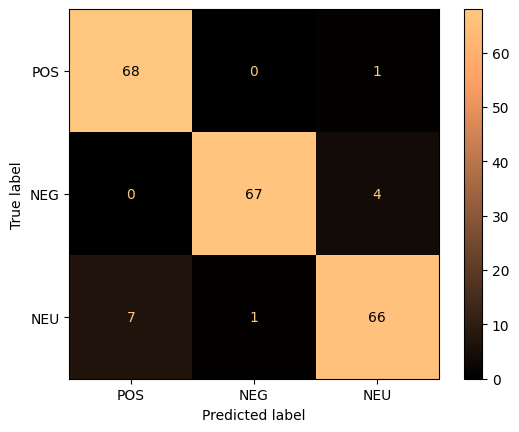

In [42]:
for model in [logisticModel,LSTMModel,GRUModel]:
    print('\n\n\n ' + str(model.__name__) + '\n\n')
    runModel(spectral_data,model)